Test antrenare: 
['5.4', '3.4', '1.7', '0.2']Iris-setosa
['6.3', '2.8', '5.1', '1.5']Iris-virginica
['5.0', '3.2', '1.2', '0.2']Iris-setosa
['7.1', '3.0', '5.9', '2.1']Iris-virginica
['6.3', '3.4', '5.6', '2.4']Iris-virginica
['7.7', '2.8', '6.7', '2.0']Iris-virginica
['4.9', '3.1', '1.5', '0.1']Iris-setosa
['5.5', '4.2', '1.4', '0.2']Iris-setosa
['5.8', '2.7', '5.1', '1.9']Iris-virginica
['5.0', '2.3', '3.3', '1.0']Iris-versicolor
['6.7', '3.1', '5.6', '2.4']Iris-virginica
['5.7', '2.9', '4.2', '1.3']Iris-versicolor
['4.6', '3.6', '1.0', '0.2']Iris-setosa
['6.4', '3.1', '5.5', '1.8']Iris-virginica
['6.5', '3.0', '5.8', '2.2']Iris-virginica
['5.4', '3.9', '1.3', '0.4']Iris-setosa
['5.0', '3.4', '1.5', '0.2']Iris-setosa
['6.9', '3.2', '5.7', '2.3']Iris-virginica
['6.3', '2.7', '4.9', '1.8']Iris-virginica
['6.8', '3.0', '5.5', '2.1']Iris-virginica
['7.7', '3.8', '6.7', '2.2']Iris-virginica
['5.4', '3.0', '4.5', '1.5']Iris-versicolor
['5.9', '3.2', '4.8', '1.8']Iris-versicolor
['6.5', '2.

,mse,accuracy
0,0.137400,0.305556
1,0.136705,0.305556
2,0.136037,0.305556
3,0.135392,0.305556
4,0.134770,0.305556
...,...,...
29995,0.028513,0.972222
29996,0.028506,0.972222
29997,0.028500,0.972222
29998,0.028494,0.972222


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
Accuracy: 1.0


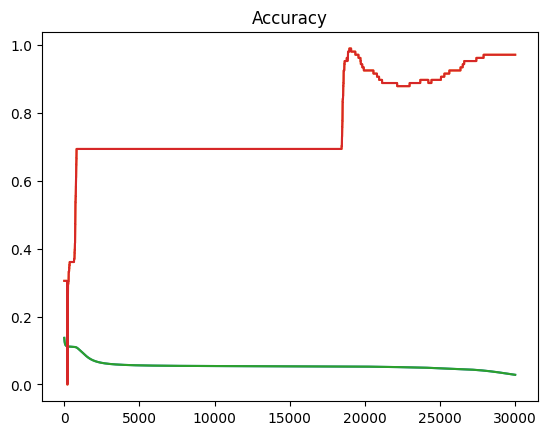

In [36]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

flower = pd.read_csv(
    'C:\D\Tudor\ANUL III\Semestrul_I\AI\Laboratoare\lab6\iris.data.txt', sep=",", header=None)
flower = flower.sample(frac=1).reset_index(drop=True)  # Shuffle
flower.columns = ['SLength', 'SWidth', 'PLength', 'PWidth', 'Species']
flower['Species'] = flower['Species'].map(
    {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
flower


def read_input(atributesAntr_data, atributesTest_data, atributesAntr_result, atributesTest_result):
    f = open("C:\D\Tudor\ANUL III\Semestrul_I\AI\Laboratoare\lab6\iris.data.txt", 'r')
    list_data = []
    while True:
        line = f.readline()
        line = line.strip()
        if len(line) == 0:
            break
        line = line.split(',')
        list_data.append(line)
    n = int(0.8 * len(list_data))
    random_numbers = random.sample(range(len(list_data)), k=n)
    for index in range(len(random_numbers)):
        atributesAntr_result.append(list_data[random_numbers[index]][-1])
        list_data[random_numbers[index]].pop(-1)
        atributesAntr_data.append(list_data[random_numbers[index]])

    for index in range(len(list_data)):
        if index not in random_numbers:
            atributesTest_result.append(list_data[index][-1])
            list_data[index].pop(-1)
            atributesTest_data.append(list_data[index])


class Sigmoid:
    def __init__(self):
        self.output = []

    def forward(self, inputs):
        for i in inputs:
            self.output.append(1 / (1 + np.exp(-i)))
            # self.output.append(i)

    def sigmoid_derivat(x):
        return np.multiply(x, 1-x)


# def error(weights, actual, predicted):
#    return 0.5 * (actual, predicted)

class Layer:
    def __init__(self, nr_inputs, nr_neurons):
        self.weights = 0.10 * np.random.randn(nr_inputs, nr_neurons)
        self.biases = np.zeros((1, nr_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Loss:
    def forward(self, predicted, true):
        samples = len(predicted)
        predicted_clipped = np.clip(predicted, 1e-7, 1-1e-7)

        correct = predicted_clipped[range(samples), true]
        neg_log_likelihoods = - np.log(correct)
        return neg_log_likelihoods

    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivat(x):
    return np.multiply(x, 1-x)


def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)


def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()


def main():
    x = np.array(flower[['SLength', 'SWidth', 'PLength', 'PWidth']])

    one_hot_encoder = OneHotEncoder(sparse=False)
    y = one_hot_encoder.fit_transform(np.array(flower.Species).reshape(-1, 1))

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

    atributesAntr_data = []
    atributesTest_data = []
    atributesAntr_result = []
    atributesTest_result = []
    dimensiuneStratIntrare = 4
    stratIntrare = [0] * dimensiuneStratIntrare
    dimensiuneStratAscuns = 4
    stratAscuns = [0] * dimensiuneStratAscuns
    dimensiuneStratIesire = 3
    stratIesire = [0] * dimensiuneStratIesire

    ratainvatare = 0.1
    numarEpoci = 30000
    N = 150

    results = pd.DataFrame(columns=['mse', 'accuracy'])

    read_input(atributesAntr_data, atributesTest_data,
               atributesAntr_result, atributesTest_result)

    print("Test antrenare: ")
    for index in range(len(atributesAntr_data)):
        print(str(atributesAntr_data[index]) +
              str(atributesAntr_result[index]))
    print("Test testare: ")
    for index in range(len(atributesTest_data)):
        print(str(atributesTest_data[index]) +
              str(atributesTest_result[index]))

    print("Date antrenare: " + str(len(atributesAntr_data)))
    print("Date testare: " + str(len(atributesTest_data)))

    print("StratIntre: " + str(stratIntrare))
    print("StratAscuns: " + str(stratAscuns))
    print("StratIntre: " + str(stratIesire))

    print("dimensiuneStratIntrare: " + str(dimensiuneStratIntrare))
    print("dimensiuneStratAscuns: " + str(dimensiuneStratAscuns))
    print("dimensiuneStratIesire: " + str(dimensiuneStratIesire))

    print("Rata Invatare: " + str(ratainvatare))
    print("Numar Epoci: " + str(numarEpoci))

    pondereAntrenare = len(atributesAntr_data) / \
        (len(atributesTest_data) + len(atributesAntr_data))

    print("Pondere Testare: " + str(pondereAntrenare))
    print("Pondere Antrenare: " + str(1 - pondereAntrenare))

    np.random.seed(10)
    W1 = np.random.normal(scale = 0.5, size = (dimensiuneStratIntrare, dimensiuneStratAscuns))
    W2 = np.random.normal(scale = 0.5, size = (dimensiuneStratAscuns, dimensiuneStratIesire))

    
    for itr in range(numarEpoci):
        Z1 = np.dot(x_train, W1)
        A1 = sigmoid(Z1)

        Z2 = np.dot(A1, W2)
        A2 = sigmoid(Z2)

        mse = mean_squared_error(A2, y_train)
        acc = accuracy(A2, y_train)
        tmp = pd.DataFrame({'mse': [mse], 'accuracy' : [acc]})
        results = pd.concat([results, tmp], ignore_index = True)        

        E1 = A2 - y_train
        dW1 = E1 * A2 * (1 - A2)

        E2 = np.dot(dW1, W2.T)
        dW2 = E2 * A1 * (1 - A1)

        W2_update = np.dot(A1.T, dW1) / N
        W1_update = np.dot(x_train.T, dW2) / N

        W2 = W2 - ratainvatare * W2_update
        W1 = W1 - ratainvatare * W1_update

    display(results)
        
    results.mse.plot(title="Mean Squared Error")
    results.accuracy.plot(title="Accuracy")
    print(results.mse.plot(title="Mean Squared Error"))
    print(results.accuracy.plot(title="Accuracy"))

    Z1 = np.dot(x_test, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    acc = accuracy(A2, y_test)
    print("Accuracy: {}".format(acc))

main()
